# OC PROJET 5 - AUTOMATICALLY CATEGORIZE QUESTIONS
#### CLEANING AND ANALYSIS NOTEBOOK
<br></br>
### SOMMAIRE
- <a href="#C1">I. Nettoyage des données</a>
    
- <a href="#C2">II. Text Preprocessing</a>

- <a href="#C3">III. Feature Engineering</a>
    
- <a href="#C4">IV. Exploration des données</a>
    - 1. Matrice des corrélations
    - 2. Analyse temporelle
    - 3. Analyse Quanti/Quanti
    - 4. Analyse Quanti/Quali
    - 5. Analyse Quali/Quali
    - 6. ACP

In [3]:
# importation des librairies
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager as rcParams
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import time

In [45]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters = k).fit(X)
    inertia.append(model.inertia_)

C:\Users\Oliver\AppData\Local\Temp\ipykernel_4460\804946866.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K_range, inertia, 'bx-', color = 'springgreen')


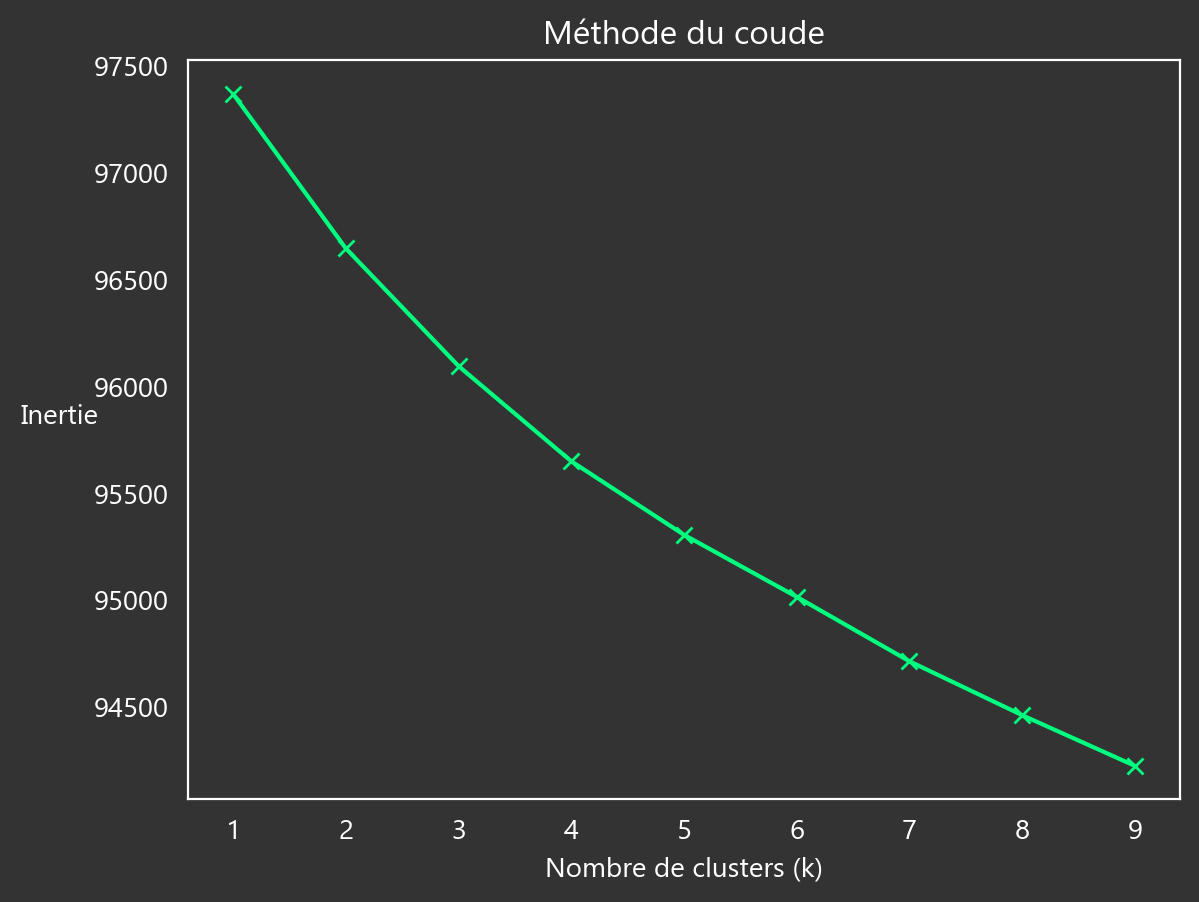

In [47]:
plt.rcParams['font.family'] = 'Ebrima'
plt.plot(K_range, inertia, 'bx-', color = 'springgreen')
plt.xlabel('Nombre de clusters (k)', color = 'white')
plt.gca().yaxis.set_label_coords( - 0.13, 0.5)
plt.ylabel('Inertie', rotation = 360, color = 'white')
plt.title('Méthode du coude')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.show()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Extraction des fonctionnalités avec TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["Body"])

# Application de l'algorithme de clustering (K-means)
num_clusters = 5  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Affichage des mots clés pour chaque cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster", i)
    for ind in order_centroids[i, :10]:  # Afficher les 10 mots clés les plus représentatifs
        print(terms[ind])
    print()
    
# Dans cette dernière partie, nous récupérons les indices 
# des centres de cluster triés dans l'ordre décroissant 
# en termes de proximité avec les mots clés. 
# Ensuite, nous récupérons les mots clés à partir du TfidfVectorizer. 
# Ensuite, nous itérons sur chaque cluster et affichons 
# les 10 mots clés les plus représentatifs pour chaque cluster.

Cluster 0
import
error
component
export
react
return
file
class
module
code

Cluster 1
file
line
error
directory
code
folder
like
use
want
new

Cluster 2
like
code
function
use
want
data
way
value
return
work

Cluster 3
public
class
private
new
void
string
return
static
method
null

Cluster 4
error
run
server
project
version
build
application
file
test
install



C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cluster 0:
Ce cluster est centré sur les mots liés à l'importation de modules, aux erreurs, aux composants et à l'exportation dans le contexte du développement avec React. Les mots "import", "error", "component", "export", "react", "return", "file", "class", "module" et "code" suggèrent que les utilisateurs posent des questions sur l'importation de modules, la gestion des erreurs, les composants React, l'exportation de fonctionnalités, les fichiers et les classes dans le développement avec React.

Cluster 1:
Ce cluster est associé à des mots clés liés aux fichiers, aux lignes de code et à la gestion des erreurs. Les mots "file", "line", "error", "directory", "code", "folder", "like", "use", "want" et "new" indiquent que les utilisateurs posent des questions sur la gestion des fichiers, la localisation d'erreurs, la navigation dans les répertoires, l'utilisation de codes et la création de nouveaux éléments.

Cluster 2:
Ce cluster est axé sur les mots liés à l'utilisation des codes et des fonctions. Les mots "like", "code", "function", "use", "want", "data", "way", "value", "return" et "work" suggèrent que les utilisateurs posent des questions sur l'utilisation de codes, les fonctions, la manipulation des données et la résolution de problèmes.

Cluster 3:
Ce cluster est associé à des mots clés liés à la programmation orientée objet. Les mots "public", "class", "private", "new", "void", "string", "return", "static", "method" et "null" indiquent que les utilisateurs posent des questions sur les concepts de classes, d'objets, de méthodes et de variables dans la programmation orientée objet.

Cluster 4:
Ce cluster est centré sur les mots liés à l'exécution de projets, aux erreurs, aux versions et à l'installation d'applications. Les mots "error", "run", "server", "project", "version", "build", "application", "file", "test" et "install" suggèrent que les utilisateurs posent des questions sur l'exécution de projets, la gestion des erreurs, les versions de logiciels, la construction d'applications, les tests et l'installation de programmes.

In [44]:
# Extraction des fonctionnalités avec TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["Body"])

# Application de l'algorithme de clustering (K-means)
num_clusters = 4  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Affichage des mots clés pour chaque cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster", i)
    for ind in order_centroids[i, :10]:  # Afficher les 10 mots clés les plus représentatifs
        print(terms[ind])
    print()

Cluster 0
like
code
use
function
want
data
way
return
value
work

Cluster 1
import
error
file
return
component
export
react
module
class
code

Cluster 2
file
error
project
run
build
line
version
install
command
code

Cluster 3
public
class
new
private
void
string
return
static
method
null



C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cluster 0:
Ce cluster est axé sur les mots liés à la manipulation du code et des fonctions. Les mots "like", "code", "use", "function", "want", "data", "way", "return", "value" et "work" suggèrent que les utilisateurs posent des questions sur l'utilisation de fonctions, la manipulation des données et la recherche de solutions de travail.

Cluster 1:
Ce cluster est lié à l'importation, aux erreurs et à la manipulation de fichiers dans le contexte du développement de logiciels. Les mots "import", "error", "file", "return", "component", "export", "react", "module" et "class" indiquent que les utilisateurs posent des questions sur l'importation de modules, la gestion des erreurs et la manipulation des fichiers dans le cadre du développement avec React.

Cluster 2:
Ce cluster est centré sur les mots liés aux erreurs, aux projets et à l'exécution de commandes. Les mots "file", "error", "project", "run", "build", "line", "version", "install" et "command" suggèrent que les utilisateurs posent des questions sur la gestion des erreurs, l'exécution de projets, la construction de programmes et l'installation de logiciels.

Cluster 3:
Ce cluster est associé à des mots clés liés à la programmation orientée objet. Les mots "public", "class", "new", "private", "void", "string", "return", "static", "method" et "null" indiquent que les utilisateurs posent des questions sur les concepts de classes, d'objets, de méthodes et de variables dans la programmation orientée objet.

In [54]:
kmeans_labels = kmeans.labels_
# Évaluer les performances du modèle K-means
silhouette_score = metrics.silhouette_score(X.toarray(), kmeans_labels)
calinski_harabasz_score = metrics.calinski_harabasz_score(X.toarray(), kmeans_labels)
davies_bouldin_score = metrics.davies_bouldin_score(X.toarray(), kmeans_labels)

In [55]:
print("Scores K-means :")
print("Silhouette score :", silhouette_score)
print("Calinski-Harabasz score :", calinski_harabasz_score)
print("Davies-Bouldin score :", davies_bouldin_score)

Scores K-means :
Silhouette score : 0.0035867528631406825
Calinski-Harabasz score : 599.4805359501959
Davies-Bouldin score : 7.799644634682886


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Liste de questions
questions = df['Body']

# Initialisation du vectoriseur bag-of-words
vectorizer = CountVectorizer()

# Construction de la matrice de termes-document
X = vectorizer.fit_transform(questions)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Récupération des mots les plus fréquents dans chaque cluster
n_words = 10
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(3):
    print(f"Cluster {i+1} mots clés :")
    for j in range(n_words):
        print(f"- {terms[order_centroids[i, j]]}")
    print()

# Suggestions de tags basées sur les mots clés fréquents dans chaque cluster
suggested_tags = []
for i in range(3):
    tags = [terms[order_centroids[i, j]] for j in range(n_words)]
    suggested_tags.append(tags)

print("Suggestions de tags :")
for i, tags in enumerate(suggested_tags):
    print(f"Cluster {i+1} : {tags}")

Cluster 1 mots clés :
- public
- class
- new
- return
- private
- string
- void
- get
- null
- set

Cluster 2 mots clés :
- builder
- step
- version
- python
- file
- line
- requirement
- warning
- parse
- starting

Cluster 3 mots clés :
- code
- like
- use
- get
- error
- file
- would
- return
- new
- work

Suggestions de tags :
Cluster 1 : ['public', 'class', 'new', 'return', 'private', 'string', 'void', 'get', 'null', 'set']
Cluster 2 : ['builder', 'step', 'version', 'python', 'file', 'line', 'requirement', 'warning', 'parse', 'starting']
Cluster 3 : ['code', 'like', 'use', 'get', 'error', 'file', 'would', 'return', 'new', 'work']


C:\Users\Oliver\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
for i in range(4):
    print(f"Cluster {i+1} mots clés :")
    for j in range(n_words):
        print(f"- {terms[order_centroids[i, j]]}")
    print()

# Suggestions de tags basées sur les mots clés fréquents dans chaque cluster
suggested_tags = []
for i in range(4):
    tags = [terms[order_centroids[i, j]] for j in range(n_words)]
    suggested_tags.append(tags)

print("Suggestions de tags :")
for i, tags in enumerate(suggested_tags):
    print(f"Cluster {i+1} : {tags}")

Cluster 1 mots clés :
- public
- class
- new
- return
- private
- string
- void
- get
- null
- set

Cluster 2 mots clés :
- builder
- step
- version
- python
- file
- line
- requirement
- warning
- parse
- starting

Cluster 3 mots clés :
- code
- like
- use
- get
- error
- file
- would
- return
- new
- work

Cluster 4 mots clés :
- file
- error
- import
- line
- return
- code
- function
- get
- data
- run

Suggestions de tags :
Cluster 1 : ['public', 'class', 'new', 'return', 'private', 'string', 'void', 'get', 'null', 'set']
Cluster 2 : ['builder', 'step', 'version', 'python', 'file', 'line', 'requirement', 'warning', 'parse', 'starting']
Cluster 3 : ['code', 'like', 'use', 'get', 'error', 'file', 'would', 'return', 'new', 'work']
Cluster 4 : ['file', 'error', 'import', 'line', 'return', 'code', 'function', 'get', 'data', 'run']


In [4]:
df_main_tag = pd.read_csv("QueryResultsFinal.csv")

In [6]:
df_main_tag.head()

,Title,Tags,Id,Score,ViewCount,AnswerCount,CreationDate,LastActivityDate,CommentCount,body_clean,main_tag,ActivityTime
0,How to convert Decimal to Double in C#?,"['c#', 'floating-point', 'type-conversion', 'd...",4,795,72107,13,2008-07-31 21:42:52,2022-09-08 05:07:26,4,want assign decimal variable double variable d...,c#,5151
1,Calculate relative time in C#,"['c#', 'datetime', 'time', 'datediff', 'relati...",11,1645,198982,41,2008-07-31 23:55:37,2022-09-05 11:26:30,3,given specific value display relative time lik...,c#,5148
2,Determine a user's timezone,"['html', 'browser', 'timezone', 'user-agent', ...",13,704,285740,27,2008-08-01 00:42:38,2022-03-29 07:31:31,10,standard way web server able determine user ti...,html,4988
3,How to use the C socket API in C++ on z/OS,"['c++', 'c', 'sockets', 'mainframe', 'zos']",25,175,15977,9,2008-08-01 12:13:50,2023-06-01 11:20:00,1,issue getting c socket work properly c althoug...,c++,5416
4,Decoding T-SQL CAST in C#/VB.NET,"['c#', 'sql', 'vb.net', 'ascii', 'hex']",109,68,6106,2,2008-08-01 15:23:05,2019-02-10 22:11:00,3,recently site deluged resurgence botnet inject...,c#,3845


In [7]:
df_main_tag = df_main_tag.iloc[:10000,]

In [14]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_main_tag['body_clean']
y = df_main_tag['main_tag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# sentences = [title.split() for title in X_train]

sentences = X_train

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_word_embeddings(words):
    embeddings = []
    for word in words:
        if word in model.wv.key_to_index:
            embeddings.append(model.wv[word])
    if not embeddings:
        # Si aucun mot n'est présent dans le modèle Word2Vec, renvoyer un vecteur nul
        embeddings.append(np.zeros(100))
    return embeddings

X_train_embeddings = [np.mean(get_word_embeddings(word), axis=0) for word in X_train]
X_test_embeddings = [np.mean(get_word_embeddings(word), axis=0) for word in X_test]

In [15]:
X_train_embeddings

[array([ 8.40351172e-03,  5.98065834e-03,  6.15558177e-02,  3.55935432e-02,
        -5.21866651e-03,  7.76058761e-03,  2.94871200e-02,  1.15731150e-01,
        -8.68258700e-02, -5.87017983e-02,  2.25178115e-02,  1.86601765e-02,
         3.29062380e-02,  3.39457467e-02,  5.47718853e-02,  3.69409332e-03,
         2.00575411e-01, -1.25861945e-04, -8.20260718e-02, -2.03316584e-01,
         1.58720184e-02, -2.30879411e-02,  1.32959038e-01, -9.03732926e-02,
        -7.80504495e-02,  7.08947852e-02, -1.09804347e-01,  5.13016619e-02,
         5.97467273e-03,  6.34336397e-02,  1.25458375e-01, -9.37538370e-02,
        -2.68510114e-02, -9.54449251e-02, -3.42424847e-02, -3.32506597e-02,
         6.88136509e-03,  1.87216420e-02, -5.06132208e-02, -4.76772152e-02,
         2.84188632e-02,  3.96845900e-02, -3.06690182e-03,  4.05947911e-03,
        -5.99980205e-02, -8.22517499e-02, -4.93683964e-02, -7.78428987e-02,
        -4.41331379e-02,  5.24417870e-02, -2.35841759e-02, -1.17981762e-01,
        -4.2

In [16]:
y_train

9069       c++
2603        c#
7738       c++
1579        c#
5058      .net
         ...  
5734    python
5191       c++
5390      java
860         c#
7270       c++
Name: main_tag, Length: 7000, dtype: object

In [27]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_embeddings, y_train)

y_pred = classifier.predict(X_test_embeddings)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.33466666666666667


In [21]:
from collections import Counter

In [22]:
counter = Counter(y_pred)

In [24]:
counter_test = Counter(y_test)

In [26]:
counter.most_common(50)

[('c#', 2725), ('java', 202), ('c++', 54), ('python', 15), ('javascript', 4)]

In [25]:
counter_test.most_common(50)

[('c#', 925),
 ('java', 551),
 ('c++', 419),
 ('python', 273),
 ('javascript', 271),
 ('php', 228),
 ('.net', 166),
 ('html', 79),
 ('ios', 52),
 ('android', 36)]

In [139]:
# Affichage du vocabulaire appris par le modèle
print("Vocabulary size:", len(model.wv))

# Exemple d'utilisation des embeddings de mots
word = 'example'
embedding = model.wv[word]
print("Embedding for word '{}':".format(word), embedding)

Vocabulary size: 52299
Embedding for word 'example': [-0.25936562  0.15200621  0.01807356 -0.13734147  0.0705125  -0.5474165
  0.08879673  0.60448503 -0.37876445 -0.24540812 -0.23142496 -0.5144474
 -0.14897914  0.19504784  0.06010302 -0.13332213  0.1769564  -0.18866442
 -0.0486795  -0.87555104  0.14999732  0.10240361  0.43931603 -0.2032459
 -0.10281774 -0.11090832 -0.3753319  -0.12647507 -0.3110282   0.21066971
  0.3280494  -0.07155612  0.02590562 -0.38158134 -0.237093    0.37703934
  0.00203667 -0.13515227 -0.08887474 -0.51847875  0.18788925 -0.29541087
 -0.19128637  0.1265671   0.2386061  -0.01624359 -0.32973015 -0.08718704
  0.14430715  0.10562557  0.18880244 -0.22090873  0.10622562 -0.10087436
 -0.2935861   0.06960256  0.3386353  -0.04827023 -0.12778522  0.04154273
  0.2318982   0.06602743  0.09966166  0.01533507 -0.24544181  0.40595302
  0.04797726  0.32791045 -0.43668804  0.24396828 -0.20653036  0.28063795
  0.45155138  0.12166907  0.34192592  0.00430784  0.06519173 -0.12430003
 

In [ ]:
# sauvegarde du modèle de regression logistique

In [28]:
import pickle

In [32]:
# save the model to disk
filename = 'logistic_regression_word2vec.pickle'
pickle.dump(classifier, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# II Essai des modèles